In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches


pd.set_option('display.max_columns', None)
D_data = pd.read_csv(r'C:\Users\lelou6\Desktop\uni\intro DS\archive\recruitmentdataset-2022-1.3.csv')
D_data = D_data[(D_data['company'] == 'D') & (D_data['sport'].isin(['Swimming', 'Football', 'Golf']))]
D_data = D_data.drop(columns=['company','Id'])
D_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 3000 to 3999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 474 non-null    object
 1   age                    474 non-null    int64 
 2   nationality            474 non-null    object
 3   sport                  474 non-null    object
 4   ind-university_grade   474 non-null    int64 
 5   ind-debateclub         474 non-null    bool  
 6   ind-programming_exp    474 non-null    bool  
 7   ind-international_exp  474 non-null    bool  
 8   ind-entrepeneur_exp    474 non-null    bool  
 9   ind-languages          474 non-null    int64 
 10  ind-exact_study        474 non-null    bool  
 11  ind-degree             474 non-null    object
 12  decision               474 non-null    bool  
dtypes: bool(6), int64(3), object(4)
memory usage: 32.4+ KB


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


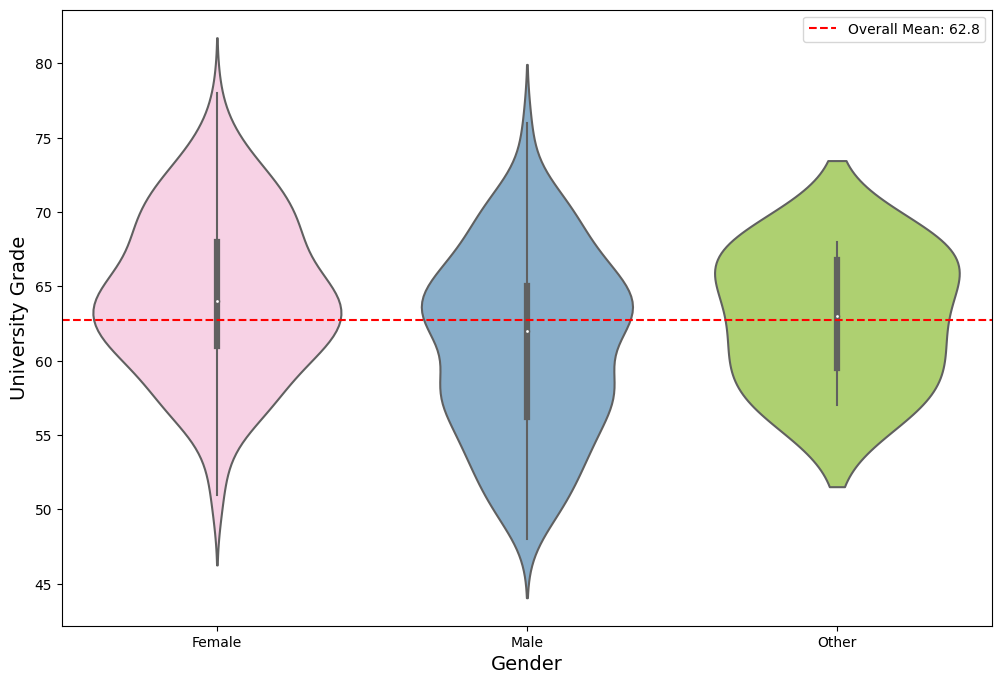

In [2]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#a57c1b"]
female_color = colors[7]
male_color = colors[1]

gender_colors = [female_color, male_color, '#b2e061']
gender_labels = ['Female', 'Male', 'Other']

unique_genders = D_data['gender'].unique()

gender_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(gender_colors, gender_labels[:len(unique_genders)])]

palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}

plt.figure(figsize=(12, 8))

sns.violinplot(data=D_data, x='gender', y='ind-university_grade', palette=palette)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('University Grade', fontsize=14)


labels = [label.capitalize() for label in D_data['gender'].unique()]
plt.xticks(ticks=range(len(labels)), labels=labels)


mean_male = D_data[D_data['gender']=='male']['ind-university_grade'].mean()
mean_female = D_data[D_data['gender']=='female']['ind-university_grade'].mean()
mean_others = D_data[D_data['gender']=='other']['ind-university_grade'].mean()

mean_of_means = (mean_male + mean_female + mean_others) / 3

plt.axhline(y=mean_of_means, color='r', linestyle='--', label=f'Overall Mean: {mean_of_means:.1f}')


plt.legend()

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


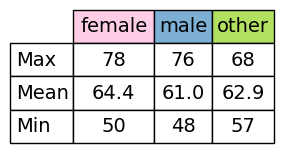

In [3]:
import matplotlib.pyplot as plt

# Assuming D_data and female_color, male_color are defined
grouped_D_data = D_data.groupby('gender')['ind-university_grade'].agg(['min', 'max'])

plt.figure(figsize=(2, 1))

max_values = D_data.groupby('gender')['ind-university_grade'].max()
mean_values = D_data.groupby('gender')['ind-university_grade'].mean().round(1)  # Round mean to 2 decimal places
min_values = D_data.groupby('gender')['ind-university_grade'].min()

plt.axis('tight')
plt.axis('off')

palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}

the_table = plt.table(cellText=[max_values, mean_values, min_values],
                      colLabels=max_values.index,
                      rowLabels=['Max', 'Mean', 'Min'],
                      cellLoc='center',
                      colColours=[palette[g] for g in max_values.index],
                      loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(5.0, 2.0)
the_table.auto_set_column_width(col=list(range(len(max_values.index))))

plt.show()


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


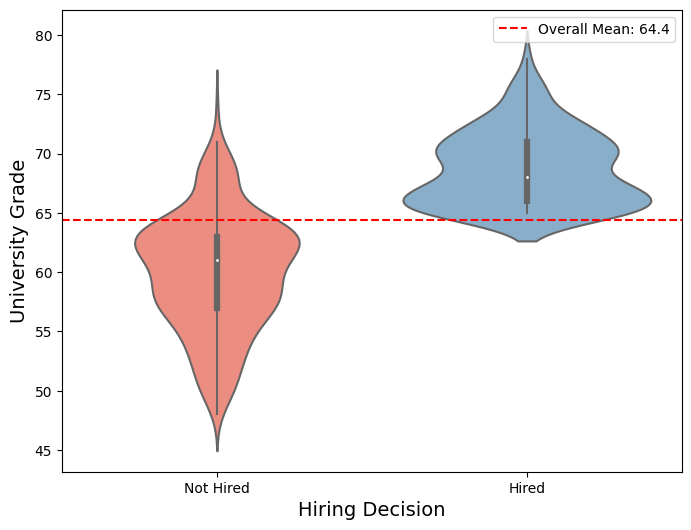

In [4]:
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(8, 6))

sns.violinplot(data=D_data, x='decision', y='ind-university_grade')

plt.xlabel('Hiring Decision', fontsize=14)
plt.ylabel('University Grade', fontsize=14)

mean_notH = D_data[D_data['decision']==False]['ind-university_grade'].mean()
mean_H = D_data[D_data['decision']==True]['ind-university_grade'].mean()

mean_of_means = (mean_notH + mean_H) / 2

plt.xticks(ticks=[False, True], labels=['Not Hired', 'Hired'])


plt.axhline(y=mean_of_means, color='r', linestyle='--', label=f'Overall Mean: {mean_of_means:.1f}')

plt.legend()


plt.show()

C:\Users\lelou6\AppData\Local\Temp\ipykernel_16160\1681359153.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  selection_rates_natgen_age = filtered_data.groupby(['nationality_gender', 'age_group'])['decision'].mean().reset_index()
C:\Users\lelou6\AppData\Local\Temp\ipykernel_16160\1681359153.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\

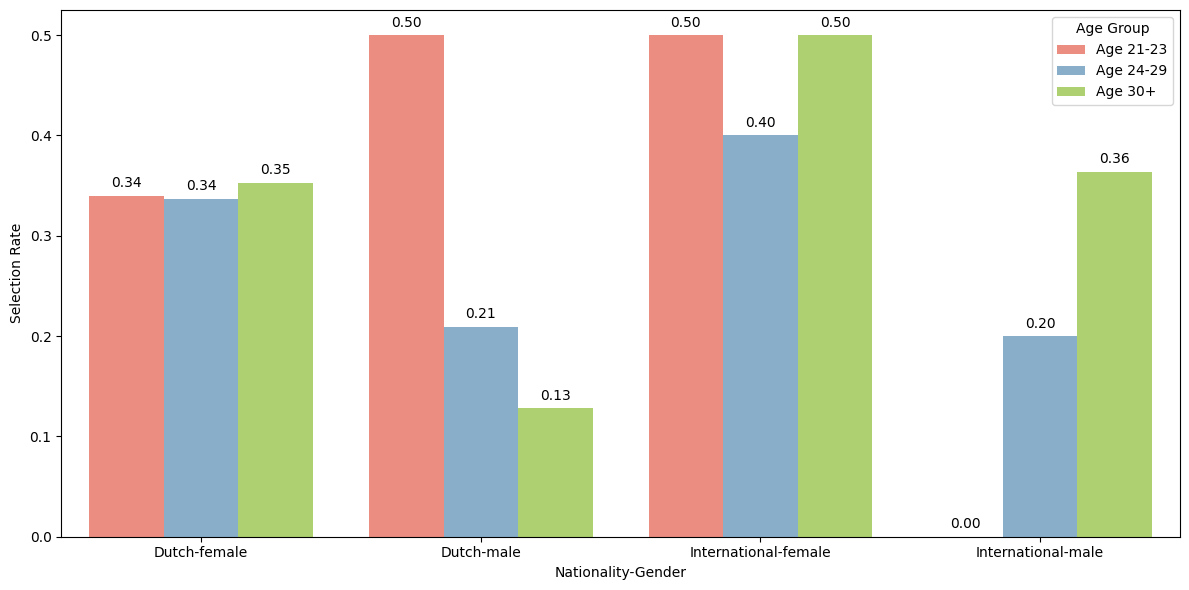

In [5]:
bins = [47, 64, 69, 100] 
labels = ['Grade 48-64', 'Grade 65-69', 'Grade 70+']
D_data['grade_group'] = pd.cut(D_data['ind-university_grade'], bins=bins, labels=labels, right=True)

bins = [20, 23, 29, 100]  
labels = ['Age 21-23', 'Age 24-29', 'Age 30+']
D_data['age_group'] = pd.cut(D_data['age'], bins=bins, labels=labels, right=True)

# Simplify nationality and filter data for specified genders
D_data['simple_nationality'] = D_data['nationality'].apply(lambda x: 'Dutch' if x == 'Dutch' else 'International')
filtered_data = D_data[D_data['gender'].isin(['female', 'male'])].copy()  # Creating a copy to avoid warnings

filtered_data['nationality_gender'] = filtered_data['simple_nationality'] + '-' + filtered_data['gender']

selection_rates_natgen_age = filtered_data.groupby(['nationality_gender', 'age_group'])['decision'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)

# Display max values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Nationality-Gender')
plt.ylabel('Selection Rate')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

C:\Users\lelou6\AppData\Local\Temp\ipykernel_16160\1490839101.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(

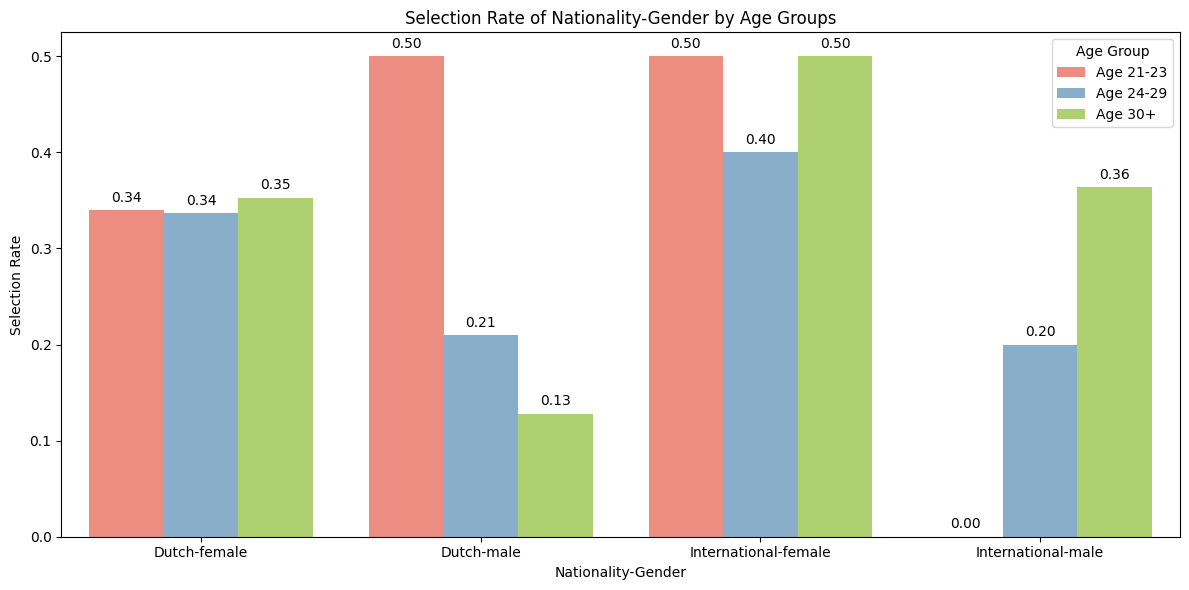

In [6]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)

# Display max values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 9),
                textcoords='offset points')

plt.title('Selection Rate of Nationality-Gender by Age Groups')
plt.xlabel('Nationality-Gender')
plt.ylabel('Selection Rate')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


C:\Users\lelou6\AppData\Local\Temp\ipykernel_16160\447305845.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_degree_prob = D_data.groupby(['age_bin', 'ind-degree'])['decision'].mean().reset_index()
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals 

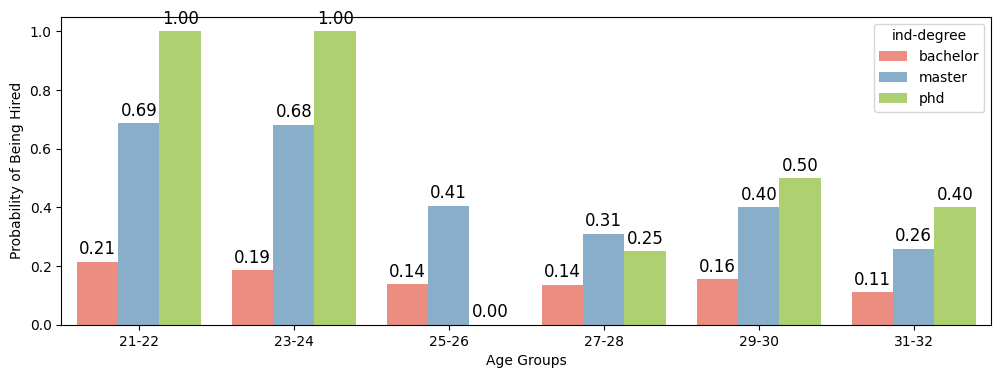

In [7]:
bins = [20, 22, 24, 26, 28, 30, 32]
labels = ['21-22', '23-24', '25-26', '27-28', '29-30', '31-32']

D_data['age_bin'] = pd.cut(D_data['age'], bins=bins, labels=labels, right=False)

age_degree_prob = D_data.groupby(['age_bin', 'ind-degree'])['decision'].mean().reset_index()

def plot_prob(D_data, x, hue, y='decision', title=''):
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=D_data, x=x, hue=hue, y=y)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 9), 
                    textcoords='offset points')

    plt.title(title)
    plt.ylabel('Probability of Being Hired')
    plt.xlabel('Age Groups')
    plt.show()

plot_prob(age_degree_prob, 'age_bin', 'ind-degree')


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

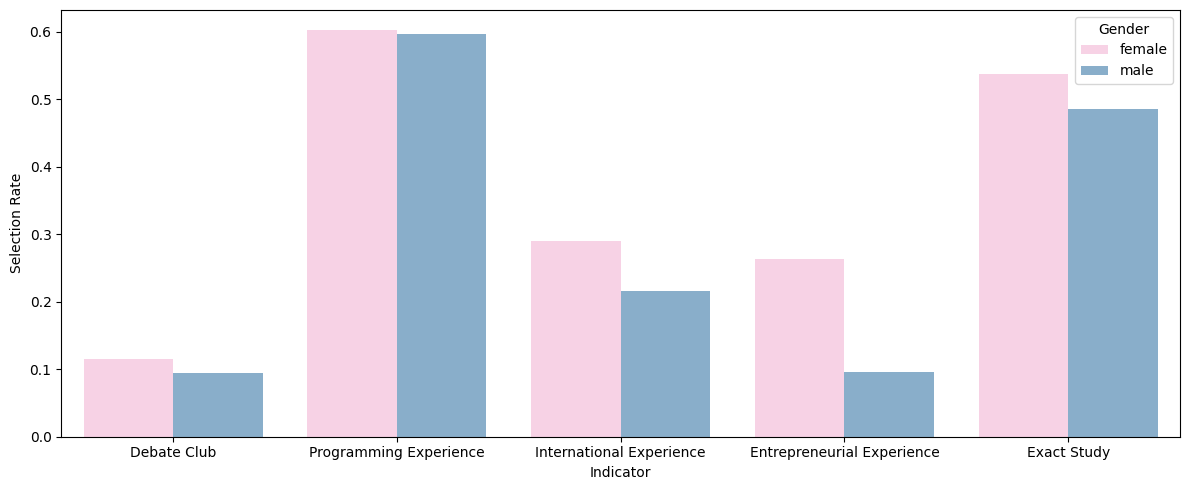

In [8]:
gender_data = D_data[D_data['gender'].isin(['female', 'male'])]

indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

selection_rates_gender = pd.DataFrame()

for ind in indicators:
    rates = gender_data[gender_data[ind] == True].groupby('gender')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_gender = pd.concat([selection_rates_gender, rates], axis=0)

palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}

plt.figure(figsize=(12, 5))
sns.barplot(data=selection_rates_gender, x='indicator', y='decision', hue='gender', palette=palette)

new_labels = ['Debate Club', 'Programming Experience', 'International Experience', 'Entrepreneurial Experience', 'Exact Study']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.xlabel('Indicator')
plt.ylabel('Selection Rate')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


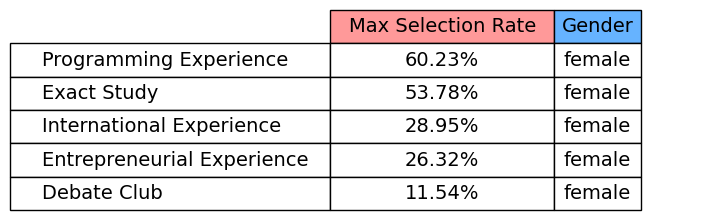

In [9]:
gender_data = D_data[D_data['gender'].isin(['female', 'male'])]

indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

selection_rates_gender = pd.DataFrame()

for ind in indicators:
    rates = gender_data[gender_data[ind] == True].groupby('gender')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_gender = pd.concat([selection_rates_gender, rates], axis=0)

max_rates_gender = selection_rates_gender.groupby('indicator')['decision'].max().reset_index()
max_rates_gender = max_rates_gender.sort_values(by='decision', ascending=False).reset_index(drop=True)

max_gender_for_rate = []
for ind in max_rates_gender['indicator']:
    max_rate = max_rates_gender[max_rates_gender['indicator'] == ind]['decision'].values[0]
    gender_for_max_rate = selection_rates_gender[
        (selection_rates_gender['indicator'] == ind) & 
        (selection_rates_gender['decision'] == max_rate)
    ]['gender'].values
    
    if len(gender_for_max_rate) > 1:
        max_gender_for_rate.append("Both")
    else:
        max_gender_for_rate.append(gender_for_max_rate[0])

max_rates_gender['gender_for_max_rate'] = max_gender_for_rate

prettier_indicators = [
    'Debate Club',
    'Programming Experience',
    'International Experience',
    'Entrepreneurial Experience',
    'Exact Study'
]

sorted_prettier_indicators = [prettier_indicators[indicators.index(ind)] for ind in max_rates_gender['indicator']]

max_rates_gender['decision'] = (max_rates_gender['decision'] * 100).apply(lambda x: f"{x:.2f}%")

plt.figure(figsize=(6, 2))

plt.axis('tight')
plt.axis('off')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c4e17f']

the_table = plt.table(cellText=max_rates_gender[['decision', 'gender_for_max_rate']].values,
                      colLabels=['Max Selection Rate', 'Gender'],
                      rowLabels=sorted_prettier_indicators,
                      cellLoc='center',
                      colColours=colors[:2],
                      loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2.5, 2.0) 
the_table.auto_set_column_width(col=list(range(2)))  

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


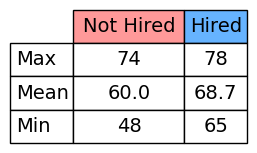

In [10]:
plt.figure(figsize=(1, 0.5))

max_values = D_data.groupby('decision')['ind-university_grade'].max()
mean_values = D_data.groupby('decision')['ind-university_grade'].mean().round(1)
min_values = D_data.groupby('decision')['ind-university_grade'].min()

plt.axis('tight')
plt.axis('off')

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c4e17f']

the_table = plt.table(cellText=[max_values, mean_values, min_values],
                      colLabels=["Not Hired", "Hired"],
                      rowLabels=['Max', 'Mean', 'Min'],
                      cellLoc='center',
                      colColours=colors[:len(max_values.index)],
                      loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(5.0, 2.0)
the_table.auto_set_column_width(col=list(range(len(max_values.index))))

plt.show()